# Visualize weights of the networks

In [1]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import MyDL
import MyDL.sample_networks
from MyDL import nn
import gzip
from struct import unpack

train_images_path = r'dataset/MNIST/train-images-idx3-ubyte.gz'
with gzip.open(train_images_path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        train_imgs=cp.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28*28)

X_train_mytensor = MyDL.MyTensor(train_imgs.reshape(-1, 1, 28, 28), requires_grad=False)

## MLP

(600, 28, 28)


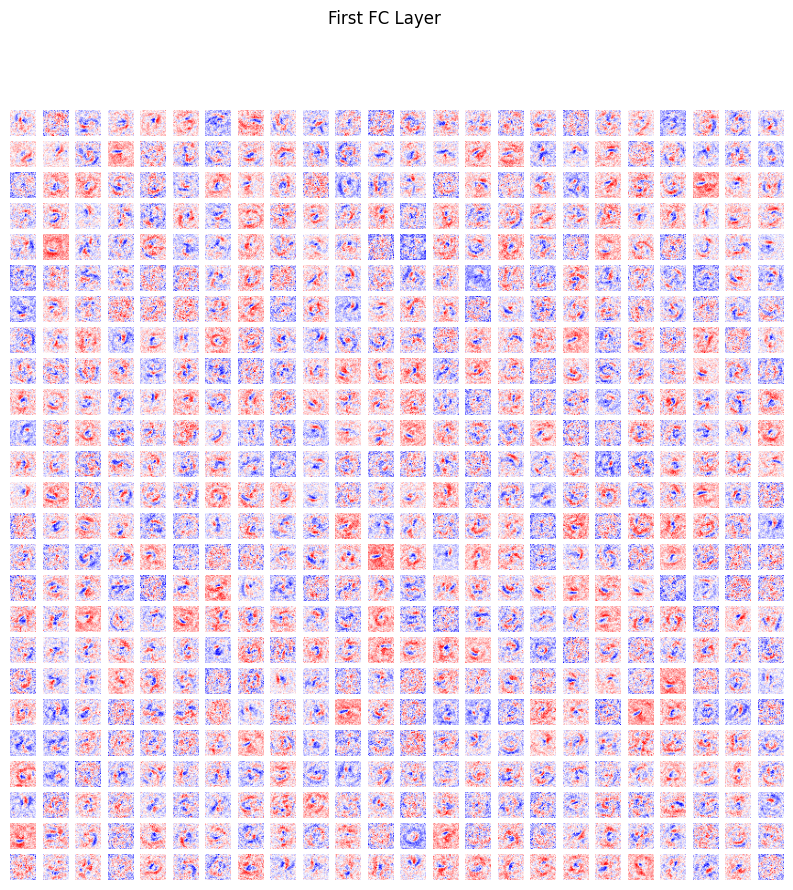

In [ ]:
model = MyDL.sample_networks.MLP2(600)
model.load(r'MNIST_result\model_params\MLP2_(600)_relu_L2-0.0_lr-0.1_augment=False_schduler=None_[500, 1000, 2000]_0.3.npz')

first_layer = model.fc1.weights.data.get().reshape(28, 28, -1).transpose(2, 0, 1)
print(first_layer.shape)
fig, axs = plt.subplots(25, 24, figsize=(10, 10))
for i in range(600):
    axs[i//24, i%24].imshow(first_layer[i], cmap='bwr')
    axs[i//24, i%24].axis('off')
plt.suptitle('First FC Layer')
plt.savefig(r'MNIST_result\figs\first_FC.pdf')
plt.show()

## ResNet

(16, 1, 3, 3)


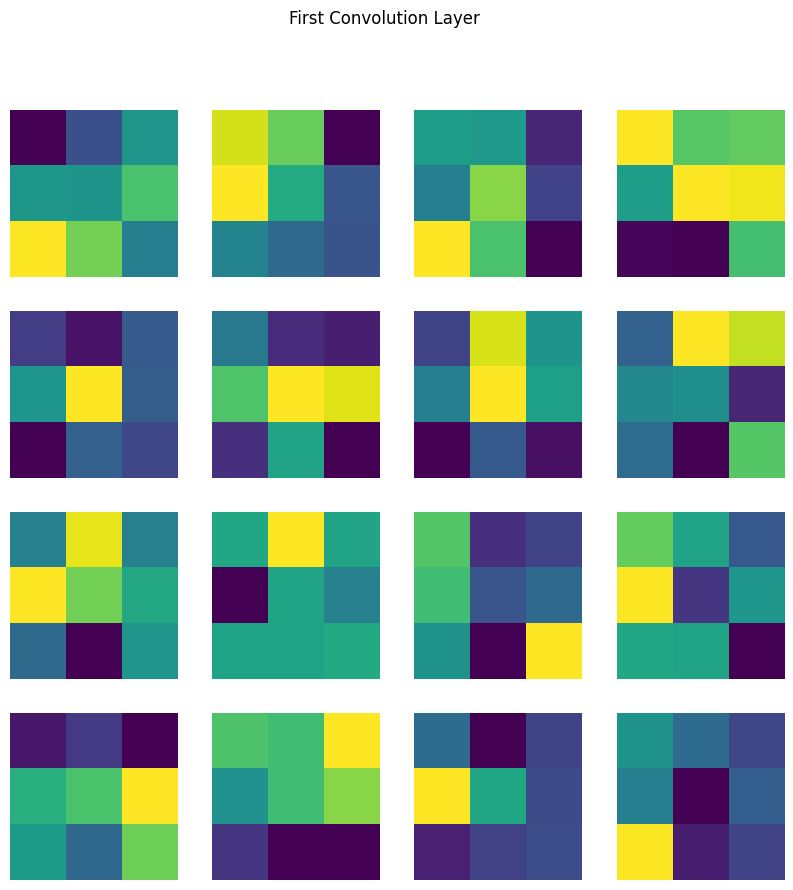

In [ ]:
model = MyDL.sample_networks.ResNetMNIST()
model.load(r'MNIST_result\model_params\ResNet_relu_L2-0.0_lr-0.1_augment=False_schduler=MultiStepLR_[2000, 4000]_0.2.npz')

first_conv = model.conv.params[0].data.get()
print(first_conv.shape)
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    axs[i//4, i%4].imshow(first_conv[i][0], cmap='viridis')
    axs[i//4, i%4].axis('off')
plt.suptitle('First Convolution Layer')
plt.savefig(r'MNIST_result\figs\first_conv.png')
plt.show()

(16, 28, 28)


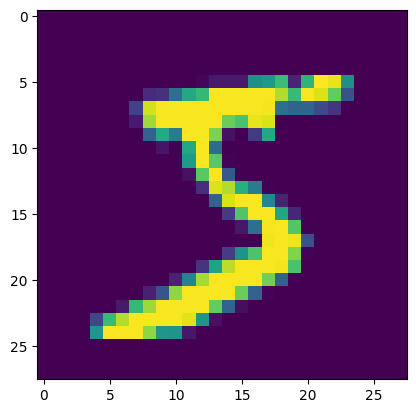

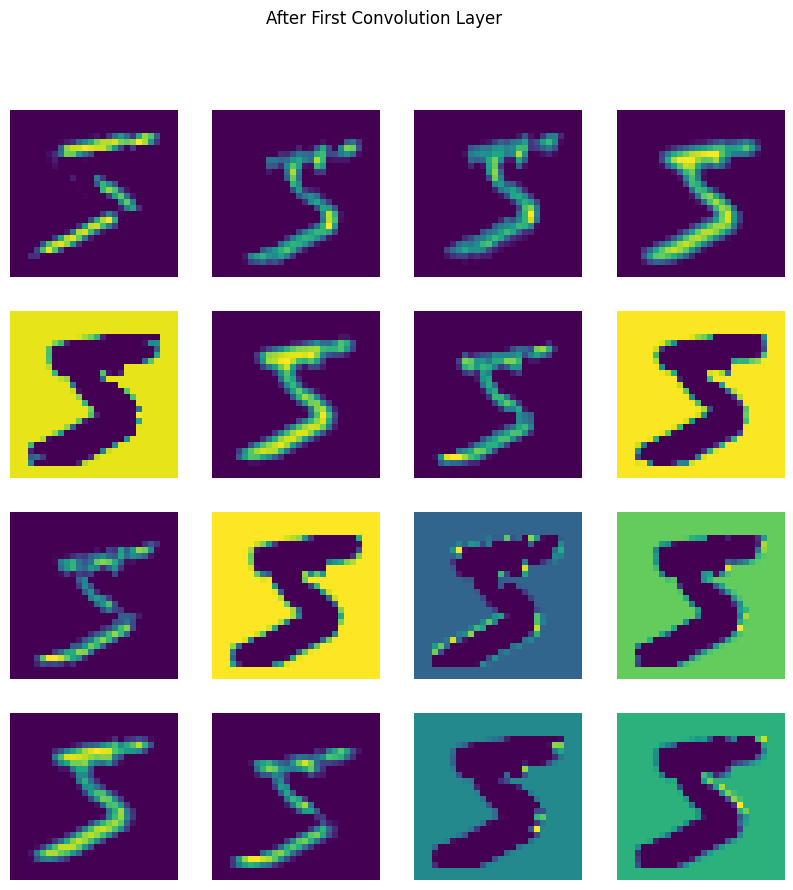

In [37]:
sample = X_train_mytensor[0].up_dim()
plt.figure()
plt.imshow(sample.data[0][0].get())

out = nn.ReLU.forward(model.bn(model.conv(sample)))[0]

print(out.shape)
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    axs[i//4, i%4].imshow(out[i].data.get(), cmap='viridis')
    axs[i//4, i%4].axis('off')
plt.suptitle('After First Convolution Layer')
plt.savefig(r'MNIST_result\results\first_conv.png')
plt.show()